## Observations and Insights 

%matplotlib inline

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr
from sklearn import datasets
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata,
                                 how='left', on="Mouse ID")
# Display the data table for preview

combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
print(f"Number of Mice: {len(combined_data_df)}")

Number of Mice: 1893


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data_df[combined_data_df.duplicated(['Mouse ID', 'Timepoint'], keep="first")]

duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
duplicate_mouse_ids = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

original_number_of_mice = combined_data_df.groupby(["Mouse ID"]).nunique()

print(f"previous number of mice: {len(original_number_of_mice)}")


combined_data_df.drop(combined_data_df.index[combined_data_df['Mouse ID'] == 'g989'], inplace = True)
clean_df = combined_data_df
new_number_of_mice = clean_df.groupby(["Mouse ID"]).nunique()

print(f"new number of mice: {len(new_number_of_mice)}")

previous number of mice: 249
new number of mice: 248


In [10]:
# Checking the number of mice in the clean DataFrame.

mice = clean_df.groupby(["Mouse ID"]).nunique()
print(f"Number of Mice: {len(mice)}")
print(f"Total Records: {len(clean_df)}")

Number of Mice: 248
Total Records: 1880


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_grouped = clean_df.groupby(["Drug Regimen"])

mean = drug_grouped["Tumor Volume (mm3)"].mean()

median = drug_grouped["Tumor Volume (mm3)"].median()

variance = drug_grouped["Tumor Volume (mm3)"].var()

std = drug_grouped["Tumor Volume (mm3)"].std()

sem = drug_grouped["Tumor Volume (mm3)"].sem()

summary_statistics = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std, "SEM": sem})

summary_statistics.head(5)


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [12]:
mean_agg = clean_df["Tumor Volume (mm3)"].mean()
median_agg = clean_df["Tumor Volume (mm3)"].median()
variance_agg = clean_df["Tumor Volume (mm3)"].var()
std_agg = clean_df["Tumor Volume (mm3)"].std()
sem_agg = clean_df["Tumor Volume (mm3)"].sem()

print(f"Mean: {round(mean_agg, 2)}; Median: {round(median_agg, 2)}; Variance: {round(variance_agg, 2)}; Standard Deviation: {round(std_agg, 2)}; SEM: {round(sem_agg, 2)}")
        
#summary = clean_df["Tumor Volume (mm3)"].agg(["count", "mean","median", "var", "std", "sem"])

#summary                                
                                   

Mean: 50.44; Median: 48.93; Variance: 79.46; Standard Deviation: 8.91; SEM: 0.21


## Bar and Pie Charts

<AxesSubplot:>

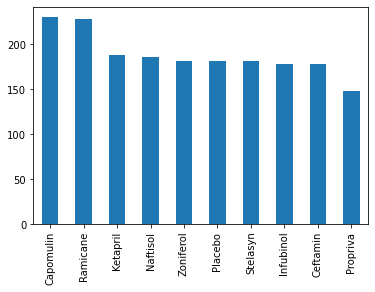

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.


summary_unique_mice = clean_df.loc[:,["Drug Regimen", "Mouse ID"]]

summary_chart = summary_unique_mice.groupby(["Drug Regimen", "Mouse ID"])

drug_regimens = summary_unique_mice.groupby(["Drug Regimen"]).nunique()

summary_df = pd.DataFrame(drug_regimens)

New = summary_df.rename(columns={"Mouse ID": "Number of Mice"})

drug_counts = clean_df["Drug Regimen"].value_counts()


drug_counts.plot.bar()

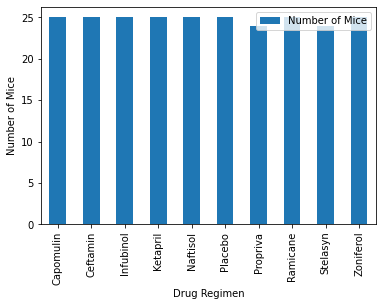

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

count_chart = New.plot(kind='bar')

count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mice")


plt.show()
plt.tight_layout()

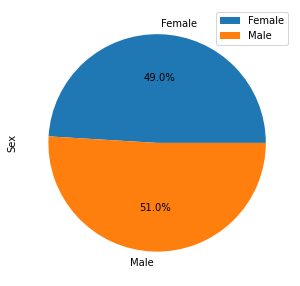

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_count = combined_data_df.groupby(["Sex"])["Sex"].count()

df = pd.DataFrame(mice_count)

plot = df.plot.pie(y='Sex', autopct='%1.1f%%', figsize=(5, 5))

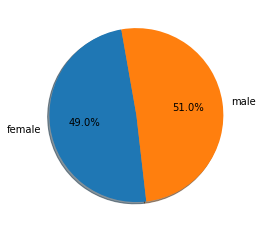

Sex
Female    922
Male      958
Name: Sex, dtype: int64

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

### Why isn't this showing the pie chart?

mice_count = combined_data_df.groupby(["Sex"])["Sex"].count()

df = pd.DataFrame(mice_count)

labels = ("female","male")

plt.pie(mice_count, labels=labels, shadow=True, autopct= "%1.1f%%", startangle=100)

plt.show()

mice_count

([<matplotlib.patches.Wedge at 0x7faa744f3cd0>,
 [Text(-1.0770538801350622, -0.22350601621881916, 'Male'),
  Text(1.0770538801350624, 0.22350601621881855, 'Female')],
 [Text(-0.5874839346191248, -0.12191237248299225, '51.0%'),
  Text(0.5874839346191248, 0.12191237248299192, '49.0%')])

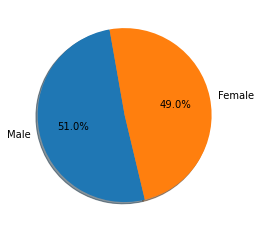

In [17]:
male = combined_data_df.loc[combined_data_df["Sex"] == "Male"].count()[0]
female = combined_data_df.loc[combined_data_df["Sex"] == "Female"].count()[0]

labels = ("Male","Female")

plt.pie([male, female], labels=labels, shadow=True, autopct= "%1.1f%%", startangle=100)


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor = clean_df.groupby(["Mouse ID"])['Timepoint'].max()

max_tumor
max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_mice = pd.merge(clean_df, max_tumor,
                                 how='right', on=['Mouse ID','Timepoint'])

merge_mice

filtered_drug = merge_mice[merge_mice['Drug Regimen'].str.contains("Capomulin|Ramicane|Infubinol|Ceftamin")]

filtered_drug.sort_values(by=['Drug Regimen']).head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
115,l897,45,38.846876,1,Capomulin,Male,17,19
85,j119,45,38.125164,1,Capomulin,Female,7,23
87,j246,35,38.753265,1,Capomulin,Female,21,21
192,u364,45,31.023923,3,Capomulin,Male,18,17
66,g316,45,40.159220,2,Capomulin,Female,22,22


In [19]:
grouped = filtered_drug.groupby(["Drug Regimen"]).describe()

grouped

Timepoint                                                 \
                 count  mean        std   min   25%   50%   75%   max   
Drug Regimen                                                            
Capomulin         25.0  41.0  10.103630  10.0  45.0  45.0  45.0  45.0   
Ceftamin          25.0  30.6  18.161314   0.0  15.0  45.0  45.0  45.0   
Infubinol         25.0  30.6  14.600228   5.0  20.0  30.0  45.0  45.0   
Ramicane          25.0  40.6  10.340052   5.0  45.0  45.0  45.0  45.0   

             Tumor Volume (mm3)             ... Age_months       Weight (g)  \
                          count       mean  ...        75%   max      count   
Drug Regimen                                ...                               
Capomulin                  25.0  36.667568  ...       21.0  24.0       25.0   
Ceftamin                   25.0  57.753977  ...       20.0  24.0       25.0   
Infubinol                  25.0  58.178246  ...       23.0  24.0       25.0   
Ramicane                   25.0  36.191390  ...       18.0  23.0       25.0   

                                                             
               mean       std   min   25%   50%   75%   max  
Drug Regimen                                                 
Capomulin     20.12  2.862400  15.0  17.0  21.0  22.0  25.0  
Ceftamin      27.40  1.683251  25.0  26.0  28.0  28.0  30.0  
Infubinol     27.32  2.174090  23.0  25.0  27.0  29.0  30.0  
Ramicane      20.00  3.354102  16.0  17.0  19.0  24.0  25.0  

[4 rows x 40 columns]

In [20]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = []

for drug in drug_list:
    final_tumor_volume = filtered_drug.loc[filtered_drug["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    tumor_volume_data.append(final_tumor_volume)
        
        
    quartiles = final_tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers.values}")
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The median is: {quartiles[0.5]} ")
    print(f"------------------------------------")
    

        
        
        

# Calculate the IQR and quantitatively determine if there are any potential outliers. 



    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
        
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: []
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The median is: 38.125164399999996 
------------------------------------
Ramicane's potential outliers: []
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
The median is: 36.56165229 
------------------------------------
Infubinol's potential outliers: [36.3213458]
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
The median is: 60.16518046 
------------------------------------
Ceftamin's potential outliers: []
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752179999997
The median is: 59.85195552 
------------------------------------


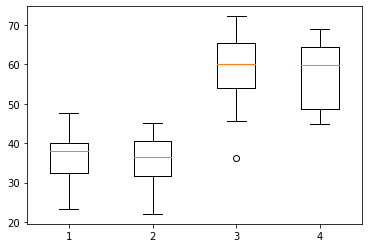

In [21]:
### why won't this make a box plot??

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin = filtered_drug.loc[filtered_drug["Drug Regimen"]== "Capomulin"]["Tumor Volume (mm3)"]
Ramicane = filtered_drug.loc[filtered_drug["Drug Regimen"]== "Ramicane"]["Tumor Volume (mm3)"]
Infubinol = filtered_drug.loc[filtered_drug["Drug Regimen"]== "Infubinol"]["Tumor Volume (mm3)"]
Ceftamin = filtered_drug.loc[filtered_drug["Drug Regimen"]== "Ceftamin"]["Tumor Volume (mm3)"]
plt.boxplot([Capomulin, Ramicane, Infubinol, Ceftamin])
#plt.boxplot(final_tumor_volume, labels=drug_list)
plt.show()


## Line and Scatter Plots

In [33]:
Capomulin_table = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
Cap_mouse = Capomulin_table.loc[Capomulin_table["Mouse ID"]=="s185"]

Cap_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
228,s185,0,45.000000,0,Capomulin,Female,3,17
447,s185,5,43.878496,0,Capomulin,Female,3,17
671,s185,10,37.614948,0,Capomulin,Female,3,17
714,s185,15,38.177232,0,Capomulin,Female,3,17
968,s185,20,36.866876,0,Capomulin,Female,3,17
1196,s185,25,33.949940,0,Capomulin,Female,3,17
1377,s185,30,32.959671,1,Capomulin,Female,3,17
1479,s185,35,28.328531,1,Capomulin,Female,3,17
1652,s185,40,25.472143,1,Capomulin,Female,3,17
1849,s185,45,23.343598,1,Capomulin,Female,3,17


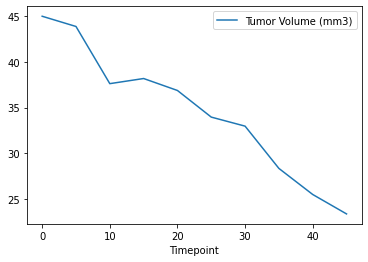

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_table = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
Cap_mouse = Capomulin_table.loc[Capomulin_table["Mouse ID"]=="s185"]

lines = Cap_mouse.plot.line(x='Timepoint', y='Tumor Volume (mm3)')

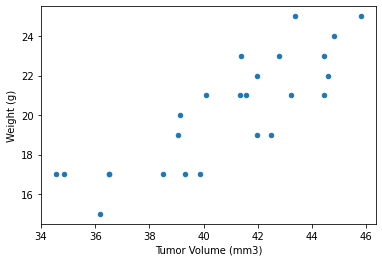

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_table = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]

Capomulin_table

volume_avg = Capomulin_table.groupby(["Mouse ID"])[["Tumor Volume (mm3)", "Weight (g)"]].mean()
#mice_count = combined_data_df.groupby(["Sex"])["Sex"].count()

volume_avg
Tumor_Weight = volume_avg.plot.scatter(x = "Tumor Volume (mm3)", y = "Weight (g)")

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation coefficient
Correlation_coefficient = volume_avg.corr()

pearsonr(volume_avg["Tumor Volume (mm3)"], volume_avg["Weight (g)"])


(0.8419363424694717, 1.322572243471279e-07)

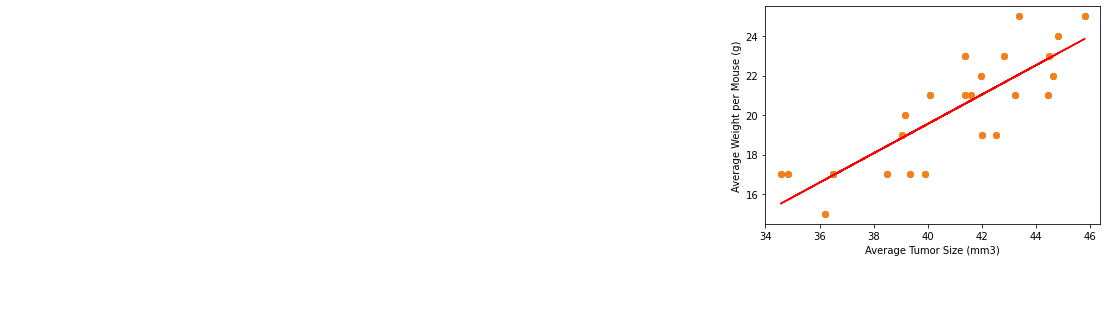

In [26]:
x_values = volume_avg['Tumor Volume (mm3)']
y_values = volume_avg['Weight (g)']
plt.scatter(x_values,y_values)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Average Tumor Size (mm3)')
plt.ylabel('Average Weight per Mouse (g)')
plt.show()